In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2

In [2]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

In [5]:


# choice = "b4b-40eV_1e17_fixndiff"
# choice = "b5b-40eV_1e18_fixndiff"
# choice = "b6b-40eV_1e19_fixndiff"
# choice = "c1a-40eV_1e17_newbout"
# choice = "c1b-40eV_1e17_precon"
# choice = "c2a-precon"
choice = "b1-jan23base"
# choice = "c1c-40eV_1e17_lofloor"
# choice = "c2ac-copy"
# choice = "c2ad-copy"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a4-lores.nc"],
                    double_load = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.607E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


In [3]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4-source-newtest.nc")

D_e = Field("D_e", mesh)
D_e.data[mesh.slices("all")] = 1
D_e.data[mesh.slices("core")] = 0.5

D_i = Field("D_d+", mesh)
D_i.data[mesh.slices("all")] = 1
D_i.data[mesh.slices("core")] = 0.5

Chi_e = Field("chi_e", mesh)
Chi_e.data[mesh.slices("all")] = 3
Chi_e.data[mesh.slices("core")] = 0.45

Chi_i = Field("chi_d+", mesh)
Chi_i.data[mesh.slices("all")] = 2
Chi_i.data[mesh.slices("core")] = 2
# D.data[mesh.slices("outer_core")] = 0.5

# Chi_i.plot()

mesh.write_field(D_e, dtype = "Field2D")
mesh.write_field(D_i, dtype = "Field2D")
mesh.write_field(Chi_e, dtype = "Field2D")
mesh.write_field(Chi_i, dtype = "Field2D")

mesh.close()
del mesh

>>> Field D_e already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field D_e to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field D_d+ already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field D_d+ to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field chi_e already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field chi_e to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field chi_d+ already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field chi_d+ to /ssd_scratch/hcases/g3a4-source-newtest.nc
Mesh file /ssd_scratch/hcases/g3a4-source-newtest.nc closed


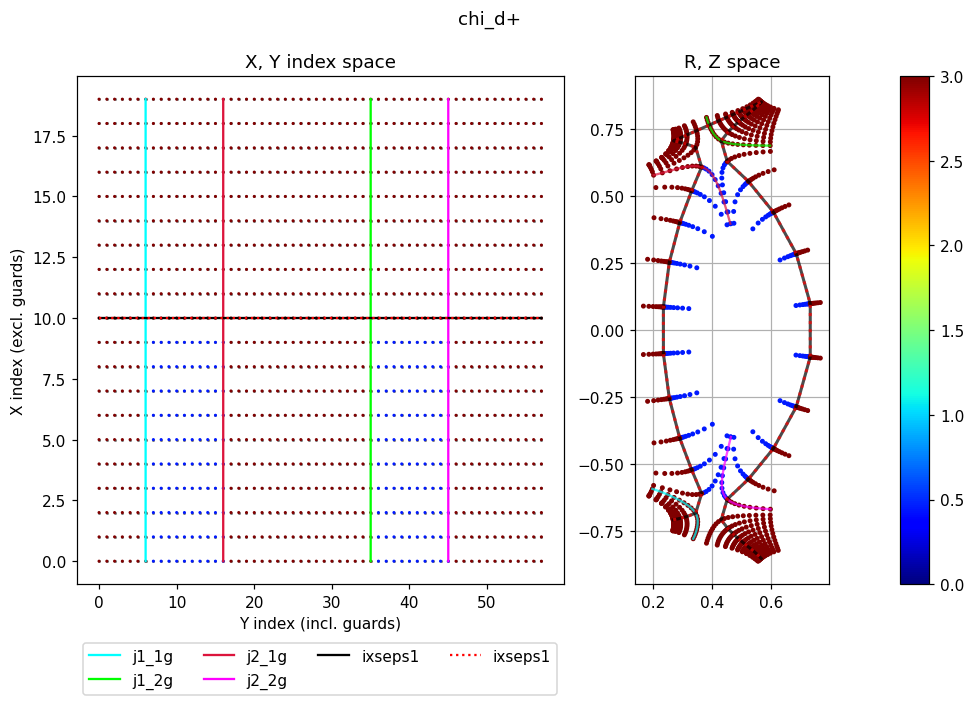

In [ ]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4-source-newtest.nc")
mesh.plot_field("chi_d+")
# set(list(mesh.mesh["chi_d+"].flatten()))

In [9]:
shutil.copytree(
    r"/ssd_scratch/hcases/b1-jan23base",
    r"/ssd_scratch/hcases/b0b-try-add-vars",
    dirs_exist_ok=True
)

for var in ["Chi_d+", "Chi_e", "D_d+", "D_e", "nu_d+", "nu_e"]:
# for var in ["Chi_d+"]:
    addvar(f"anomalous_{var}", [0], db.casepaths["b0b-try-add-vars"])

Number of restart files: 10
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.5.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.1.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.3.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.2.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.7.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.9.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.6.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.0.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.8.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.4.nc
Number of restart files: 10
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.5.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.1.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.3.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.2.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.7.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.9.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.6.nc
/ssd_scra

## Verfify the new field exists in datafile

In [4]:
with DataFile(os.path.join(db.casepaths["b0c-change-fields"], "BOUT.restart.0.nc")) as df:
    print(df.keys())

NameError: name 'db' is not defined

## Verify the new field has the correct shape

In [10]:
for casename in ["b1-jan23base", "b0b-try-add-vars"]:
    with DataFile(os.path.join(db.casepaths[casename], "BOUT.restart.0.nc")) as df:
        
        print(f'{casename}:')
        print(f'Nd+ shape: {df["Nd+"].shape}')
        if "anomalous_Chi_d+" in df.keys():
            print(f'Chi_d+ shape: {df["anomalous_Chi_d+"].shape}')
            # print(df["anomalous_Chi_d+"])
        print("")
        


b1-jan23base:
Nd+ shape: (20, 9, 1)

b0b-try-add-vars:
Nd+ shape: (20, 9, 1)



## Plot results

In [3]:
caseng = Load.case_2D(db.casepaths["b0c-change-fields"], gridfilepath = db.gridpaths["g3a4-lores.nc"], double_load = False, keep_boundaries = False)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


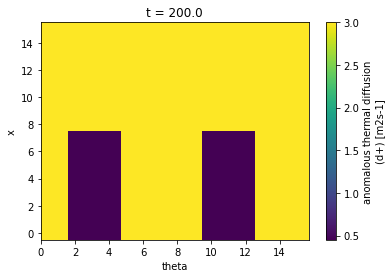

In [10]:
caseng.ds["anomalous_Chi_d+"].isel(t=-6).plot()

In [18]:
caseng.ds["anomalous_Chi_d+"].values

array([[[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.]],

       [[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.]],

       [[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.]],

       ...,

       [[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3.

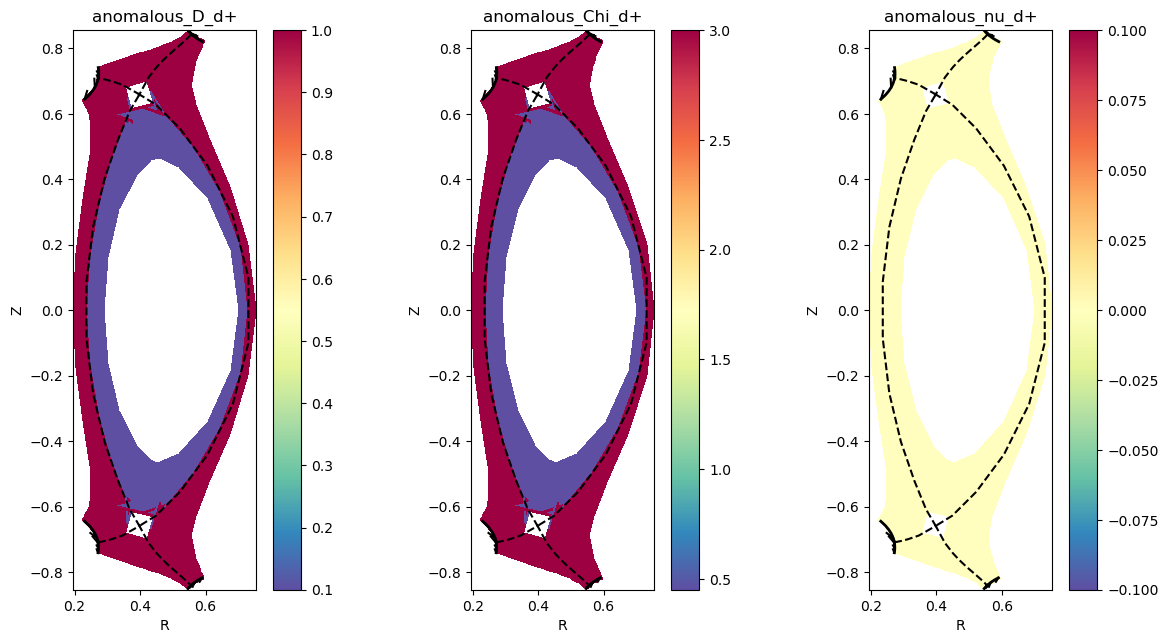

In [14]:
data = caseng.ds

cols = 3
fig, axes = plt.subplots(1,cols, figsize = (cols*4,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = 0

x = "d+"

data[f"anomalous_D_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False)
data[f"anomalous_Chi_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False)
data[f"anomalous_nu_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False)

# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

>>> Field D_e already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field D_e to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field D_d+ already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field D_d+ to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field chi_e already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field chi_e to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field chi_d+ already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field chi_d+ to /ssd_scratch/hcases/g3a4-source-newtest.nc


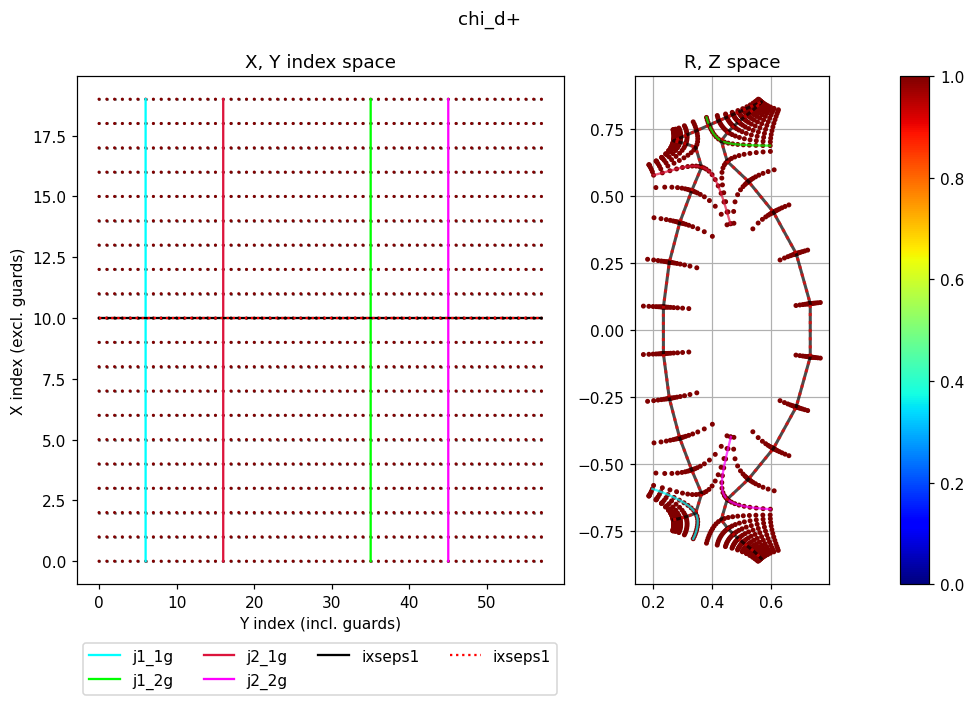

In [4]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4-source-newtest.nc")

D_e = Field("D_e", mesh)
D_e.data[mesh.slices("all")] = 1
D_e.data[mesh.slices("core")] = 0.5

D_i = Field("D_d+", mesh)
D_i.data[mesh.slices("all")] = 1
D_i.data[mesh.slices("core")] = 0.5

Chi_e = Field("chi_e", mesh)
Chi_e.data[mesh.slices("all")] = 1
Chi_e.data[mesh.slices("core")] = 1

Chi_i = Field("chi_d+", mesh)
Chi_i.data[mesh.slices("all")] = 1
Chi_i.data[mesh.slices("core")] = 1
# D.data[mesh.slices("outer_core")] = 0.5

Chi_i.plot()

mesh.write_field(D_e, dtype = "Field2D")
mesh.write_field(D_i, dtype = "Field2D")
mesh.write_field(Chi_e, dtype = "Field2D")
mesh.write_field(Chi_i, dtype = "Field2D")

In [4]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4-source-newtest.nc")